In [2]:
!pip install instaloader
import instaloader

In [3]:
L = instaloader.Instaloader()

# Login
username = 'sonatheresa_02'
password = 'zxcvbnm5'
L.login(username, password)

# Post URL
post_url = 'https://www.instagram.com/p/C-usjsTspnz/?hl=en'

# Extract the shortcode from the URL
shortcode = post_url.split('/')[-2]

# Load the post using the shortcode
post = instaloader.Post.from_shortcode(L.context, shortcode)

In [4]:
import pandas as pd

# Convert comments to DataFrame
df = pd.DataFrame(comments)
print(df.head())

#save csv
df.to_csv('comments.csv', index=False)

In [5]:
import pandas as pd
df=pd.read_csv('/content/comments.csv')
df.head()

,username,text
0,marco_rossi33333,Without question there is much working needing...
1,taili1o1,After being a prime minister for 10 years Modi...
2,saher_scoop,The details of the case make one disgusted to ...
3,rits.manohar,How about a law where men can't roam at night ...
4,cindymoon007,Make the world safer!!! Especially for Indian ...


In [9]:
import re
!pip install emoji
import nltk
nltk.download('punkt')
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
def remove_emoji(text):
    # Emoji pattern using regex
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Preprocessing function with emoji removal
def preprocess_text(text):
    # Remove emojis
    text = remove_emoji(text)
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and digits
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the comments
df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df['cleaned_text'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    without question much working needing done pro...
1      prime minister year modi achieve nothing safety
2    detail case make one disgusted core woman dese...
3    law men roam night past certain hour like bang...
4             make world safer especially indian woman
Name: cleaned_text, dtype: object


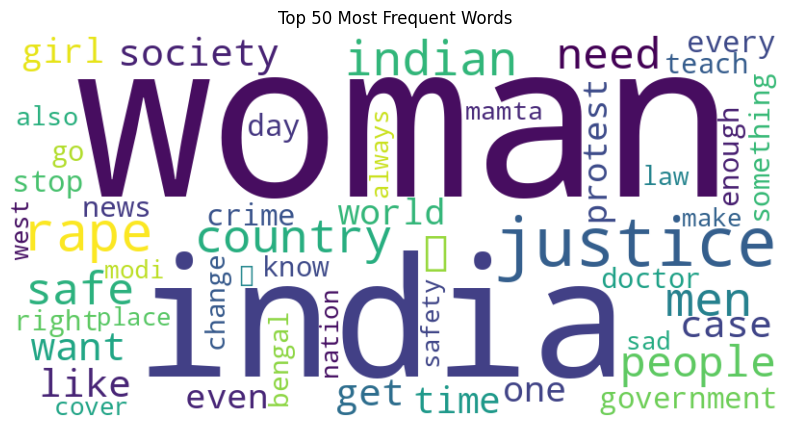

In [10]:
!pip install wordcloud matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Combine all the cleaned text into one string
all_words = ' '.join(df['cleaned_text'])

# Tokenize the combined string to get word frequencies
word_tokens = all_words.split()

# Get the 50 most common words
word_freq = Counter(word_tokens).most_common(50)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Most Frequent Words')
plt.show()


In [11]:
!pip install textblob vaderSentiment transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [18]:
from textblob import TextBlob

def textblob_sentiment(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity > 0 else (-1 if analysis.sentiment.polarity < 0 else 0)

df['textblob_sentiment'] = df['cleaned_text'].apply(textblob_sentiment)

#accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['sentiment'], df['textblob_sentiment'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5445


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = vader.polarity_scores(text)['compound']
    return 1 if score > 0 else (-1 if score < 0 else 0)

df['vader_sentiment'] = df['cleaned_text'].apply(vader_sentiment)

#accuracy
accuracy = accuracy_score(df['sentiment'], df['vader_sentiment'])
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


In [20]:
from transformers import pipeline

# Initialize sentiment-analysis pipeline
hf_analyzer = pipeline('sentiment-analysis')

def hf_sentiment(text):
    result = hf_analyzer(text)[0]
    return 1 if result['label'] == 'POSITIVE' else -1

df['hf_sentiment'] = df['cleaned_text'].apply(hf_sentiment)

#accuracy
accuracy = accuracy_score(df['sentiment'], df['hf_sentiment'])
print(f"Accuracy: {accuracy:.4f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Accuracy: 0.5496


In [21]:
# Voting among models to establish a "consensus" label for comparison
def majority_vote(row):
    sentiments = [row['textblob_sentiment'], row['vader_sentiment'], row['hf_sentiment']]
    return max(set(sentiments), key=sentiments.count)

# Calculate the majority sentiment for each row
majority_sentiments = [majority_vote(row) for _, row in df.iterrows()]

# Calculate accuracy of each model against the majority sentiment
accuracy_textblob = accuracy_score(majority_sentiments, df['textblob_sentiment'])
accuracy_vader = accuracy_score(majority_sentiments, df['vader_sentiment'])
accuracy_hf = accuracy_score(majority_sentiments, df['hf_sentiment'])

# Print the accuracy scores
print(f"Accuracy Scores based on Majority Voting:")
print(f"TextBlob Accuracy: {accuracy_textblob:.4f}")
print(f"VADER Accuracy: {accuracy_vader:.4f}")
print(f"Hugging Face Accuracy: {accuracy_hf:.4f}")


Accuracy Scores based on Majority Voting:
TextBlob Accuracy: 0.6412
VADER Accuracy: 0.9033
Hugging Face Accuracy: 0.5980


In [17]:
df['sentiment'] = df['vader_sentiment']

In [22]:
df = df[['username', 'cleaned_text', 'sentiment']]
print(df.head())

           username                                       cleaned_text  \
0  marco_rossi33333  without question much working needing done pro...   
1          taili1o1    prime minister year modi achieve nothing safety   
2       saher_scoop  detail case make one disgusted core woman dese...   
3      rits.manohar  law men roam night past certain hour like bang...   
4      cindymoon007           make world safer especially indian woman   

   sentiment  
0          1  
1         -1  
2         -1  
3          1  
4          1  


In [23]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)





*  Accuracy: The proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.
*   Precision: The proportion of true positive predictions out of all positive predictions made by the model


*  Recall: The proportion of true positive predictions out of all actual positive instances.
*  F1 Score: The harmonic mean of precision and recall, providing a balance between the two metrics.

*   ROC-AUC: The area under the Receiver Operating Characteristic curve, measuring the model's ability to distinguish between classes across various threshold settings.











In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Predict probabilities instead of class labels
y_pred_proba_lr = lr.predict_proba(X_test_tfidf)

# Predict and evaluate (using predicted labels for classification report)
y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_lr, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_lr, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_lr, average='weighted')
print(f"F1 Score: {f1:.4f}")

# ROC-AUC (Area Under the Receiver Operating Characteristic Curve)
# Handle multiclass by setting 'multi_class' to 'ovo' (one-vs-one) or 'ovr' (one-vs-rest)
roc_auc = roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovo')
print(f"ROC-AUC Score: {roc_auc:.4f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.96      0.84        25
           0       0.86      0.93      0.89        27
           1       1.00      0.67      0.80        27

    accuracy                           0.85        79
   macro avg       0.87      0.85      0.84        79
weighted avg       0.87      0.85      0.85        79

Accuracy: 0.8481
Precision: 0.8737
Recall: 0.8481
F1 Score: 0.8451
ROC-AUC Score: 0.9491


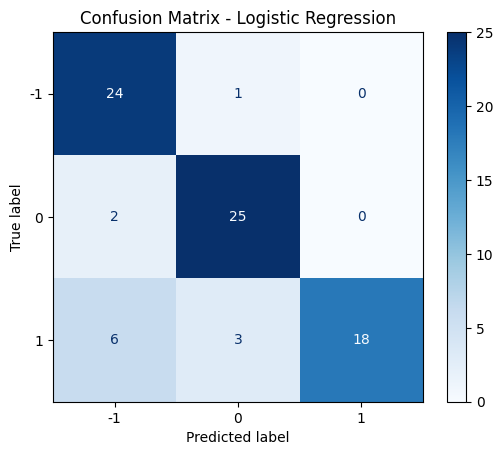

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[-1, 0, 1])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

svm = SVC(kernel='linear', probability=True)  # Enable probability estimates for ROC-AUC
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_svm, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_svm, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1:.4f}")

# ROC-AUC (Area Under the Receiver Operating Characteristic Curve)
# Binarize the output labels for ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
y_pred_proba_svm = svm.predict_proba(X_test_tfidf)

# Handle multiclass by setting 'multi_class' to 'ovo' or 'ovr'
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba_svm, multi_class='ovo')
print(f"ROC-AUC Score: {roc_auc:.4f}")


SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.78      0.84      0.81        25
           0       0.87      0.96      0.91        27
           1       0.91      0.74      0.82        27

    accuracy                           0.85        79
   macro avg       0.85      0.85      0.85        79
weighted avg       0.85      0.85      0.85        79

Accuracy: 0.8481
Precision: 0.8530
Recall: 0.8481
F1 Score: 0.8464
ROC-AUC Score: 0.9617


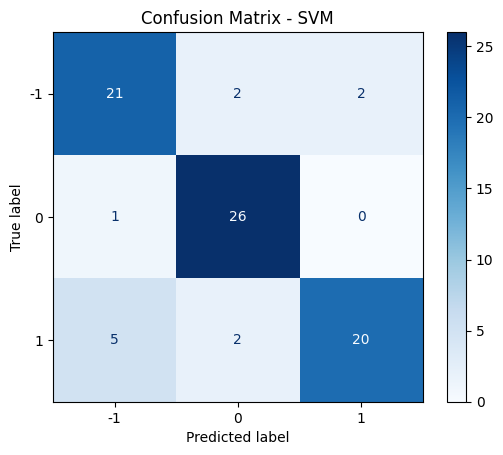

In [38]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=[-1, 0, 1])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score: {f1:.4f}")

# ROC-AUC (Area Under the Receiver Operating Characteristic Curve)
# Binarize the output labels for ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
y_pred_proba_rf = rf.predict_proba(X_test_tfidf)

# Handle multiclass by setting 'multi_class' to 'ovo' or 'ovr'
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba_rf, multi_class='ovo')
print(f"ROC-AUC Score: {roc_auc:.4f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.68      0.77        25
           0       0.73      1.00      0.84        27
           1       0.83      0.70      0.76        27

    accuracy                           0.80        79
   macro avg       0.82      0.79      0.79        79
weighted avg       0.81      0.80      0.79        79

Accuracy: 0.7975
Precision: 0.8149
Recall: 0.7975
F1 Score: 0.7927
ROC-AUC Score: 0.9578


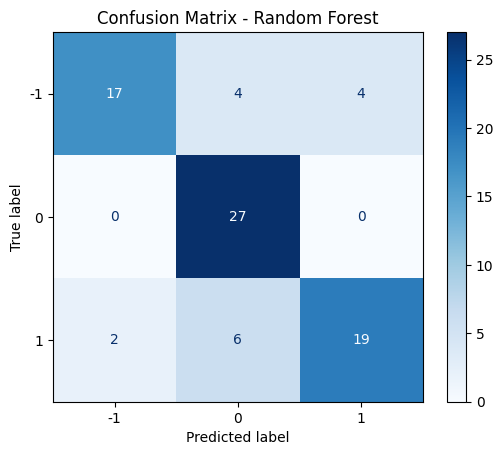

In [40]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[-1, 0, 1])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_nb, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_nb, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_nb, average='weighted')
print(f"F1 Score: {f1:.4f}")

# ROC-AUC (Area Under the Receiver Operating Characteristic Curve)
# Binarize the output labels for ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
y_pred_proba_nb = nb.predict_proba(X_test_tfidf)

# Handle multiclass by setting 'multi_class' to 'ovo' or 'ovr'
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba_nb, multi_class='ovo')
print(f"ROC-AUC Score: {roc_auc:.4f}")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.41      0.96      0.58        25
           0       0.50      0.04      0.07        27
           1       0.95      0.67      0.78        27

    accuracy                           0.54        79
   macro avg       0.62      0.55      0.48        79
weighted avg       0.63      0.54      0.47        79

Accuracy: 0.5443
Precision: 0.6256
Recall: 0.5443
F1 Score: 0.4741
ROC-AUC Score: 0.9203


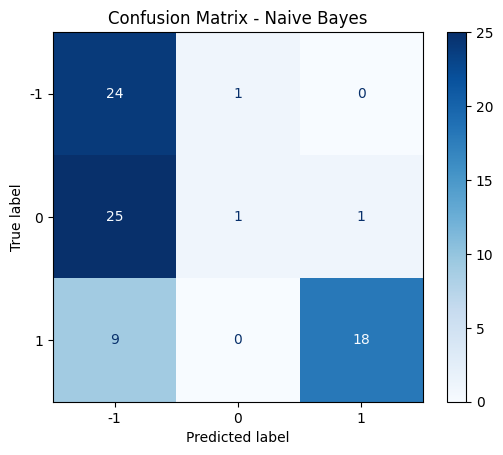

In [42]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=[-1, 0, 1])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_train_tfidf, y_train)

y_pred_sgd = sgd.predict(X_test_tfidf)

print("Stochastic Gradient Descent (SGD) Classification Report:")
print(classification_report(y_test, y_pred_sgd))

accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_sgd, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_sgd, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_sgd, average='weighted')
print(f"F1 Score: {f1:.4f}")

# ROC-AUC (Area Under the Receiver Operating Characteristic Curve)
# Binarize the output labels for ROC-AUC calculation
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
y_pred_proba_sgd = sgd.decision_function(X_test_tfidf)  # For SVM and SGD, use decision_function for ROC-AUC

# Handle multiclass by setting 'multi_class' to 'ovo' or 'ovr'
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba_sgd, multi_class='ovo')
print(f"ROC-AUC Score: {roc_auc:.4f}")


Stochastic Gradient Descent (SGD) Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.80      0.83        25
           0       0.93      1.00      0.96        27
           1       0.85      0.85      0.85        27

    accuracy                           0.89        79
   macro avg       0.88      0.88      0.88        79
weighted avg       0.88      0.89      0.88        79

Accuracy: 0.8861
Precision: 0.8845
Recall: 0.8861
F1 Score: 0.8844
ROC-AUC Score: 0.9526


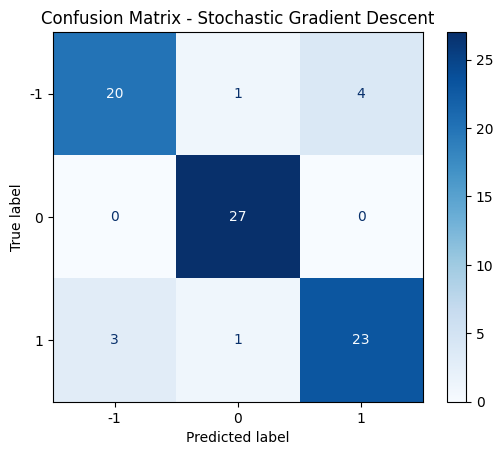

In [44]:
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
disp_sgd = ConfusionMatrixDisplay(confusion_matrix=cm_sgd, display_labels=[-1, 0, 1])
disp_sgd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Stochastic Gradient Descent')
plt.show()

Best Model:


*  Model 1 has the highest Accuracy (0.7941), Precision (0.8030), F1 Score (0.7938), and a strong ROC-AUC Score (0.9017).









*  Logistic Regression outperforms SVM across all metrics, including a better ROC-AUC, indicating that it has a stronger ability to distinguish between classes.
*   Logistic Regression shows better performance in Accuracy, Precision, Recall, and F1 Score, but Random Forest has a slightly higher ROC-AUC. Logistic Regression is generally preferable for overall predictive performance.

*   Logistic Regression clearly outperforms Naive Bayes on all metrics. Logistic Regression is more robust and better suited to the data in this case.
*   Logistic Regression surpasses SGD on all metrics, making it a better choice for this problem.






Conclusion:Overall, Logistic Regression stands out as a reliable model with a well-rounded performance across multiple metrics, suggesting its robustness and applicability to various classification tasks.